 ## Train a Logistic Regression Classifier on the Alzheimer4 MRI slices dataset.  

Let's load the dataset:

In [1]:
import numpy as np 
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'numpy'

### Import training Dataset

In [2]:
# Import training Dataset (modify the path of the data)

path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('../lab2/Alzheimer_s Dataset/train/NonDemented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('../lab2/Alzheimer_s Dataset/train/VeryMildDemented'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('../lab2/Alzheimer_s Dataset/train/MildDemented'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('../lab2/Alzheimer_s Dataset/train/ModerateDemented'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  

In [3]:
# One Hot Encoding
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Very Mild Dementia
# 2 --> Mild Dementia
# 3 --> Moderate Dementia

OneHotEncoder()

In [4]:
train_data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        train_data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        train_data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        train_data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        train_data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [5]:
train_data = np.array(train_data)
train_data.shape

(5121, 128, 128)

In [6]:
train_label = np.array(result)
train_label = train_label.reshape((5121,4))
train_label.shape

(5121, 4)

### Import test Dataset

In [7]:
# Import test Dataset (you can use the above code, or write better codes)

testpath1 = []
testpath2 = []
testpath3 = []
testpath4 = []
 

for dirname, _, filenames in os.walk('../lab2/Alzheimer_s Dataset/test/NonDemented'):
    for filename in filenames:
        testpath1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('../lab2/Alzheimer_s Dataset/test/VeryMildDemented'):
    for filename in filenames:
        testpath2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('../lab2/Alzheimer_s Dataset/test/MildDemented'):
    for filename in filenames:
        testpath3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('../lab2/Alzheimer_s Dataset/test/ModerateDemented'):
    for filename in filenames:
        testpath4.append(os.path.join(dirname, filename))  

In [8]:
test_data = []
test_result = []

for path in testpath1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        test_data.append(np.array(img))
        test_result.append(encoder.transform([[0]]).toarray())
        
for path in testpath2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        test_data.append(np.array(img))
        test_result.append(encoder.transform([[1]]).toarray())
        
for path in testpath3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        test_data.append(np.array(img))
        test_result.append(encoder.transform([[2]]).toarray())
        
for path in testpath4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128)):
        test_data.append(np.array(img))
        test_result.append(encoder.transform([[3]]).toarray())

In [9]:
test_label = np.array(test_result)
test_label = test_label.reshape((1279,4))
test_label.shape

(1279, 4)

### Show one image

In [10]:
import matplotlib

a=matplotlib.image.imread(path1[1])
a.shape

(208, 176)

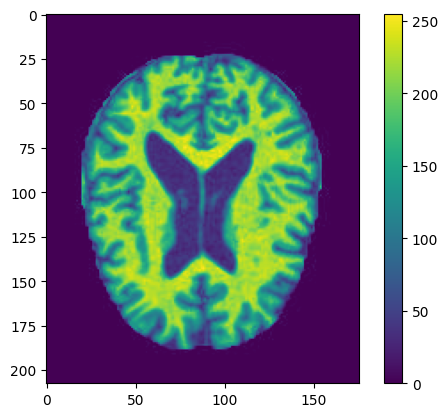

In [11]:
#If you inspect the first image in the training set, 
#you will see that the pixel values fall in the range of 0 to 255:
plt.figure()
plt.imshow(a)
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Prepare training and test data

# Shuffle data to avoid learning patterns from order

shuffle_index = np.random.permutation(len(train_data))
X_train = train_data[shuffle_index]
y_train = train_label[shuffle_index]

X_test = np.array(test_data)
y_test = test_label

In [13]:
X_train.shape

(5121, 128, 128)

In [14]:
# Convert one-hot encoding to label encoding
y_train = np.where(y_train==1)[1]
y_test = np.where(y_test==1)[1]
y_train

array([1, 1, 1, ..., 2, 2, 1])

# Problem 1: Deep Neural Network (DNN)

In [15]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron 

import tensorflow as tf
from tensorflow import keras

/Users/jasonzhang/Documents/Classes/Spring2024/MATH4570/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5121, 128, 128) (5121,)
(1279, 128, 128) (1279,)


Each pixel intensity is represented as a byte (0 to 255):

In [17]:
X_train.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [18]:
n_validation = 1000
X_valid, X_train = X_train[:n_validation] / 255., X_train[n_validation:] / 255.
y_valid, y_train = y_train[:n_validation], y_train[n_validation:]
X_test = X_test / 255.
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(4121, 128, 128) (1000, 128, 128) (1279, 128, 128)
(4121,) (1000,) (1279,)


In [19]:
y_train

array([1, 0, 1, ..., 2, 2, 1])

##  Build the Neural Network for image classification

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128, 128]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/Users/jasonzhang/Documents/Classes/Spring2024/MATH4570/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     4,915,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,946,610 (18.87 MB)

 Trainable params: 4,946,610 (18.87 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
model.get_layer(hidden1.name) is hidden1

True

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[-9.1693038e-03,  3.3549033e-03, -1.8499875e-02, ...,
         1.2365663e-02, -1.5821271e-02,  1.0913555e-02],
       [ 7.1887374e-03,  6.9646351e-03,  1.7841304e-02, ...,
        -1.6086189e-02,  2.2588037e-03,  1.7848222e-02],
       [-1.7246293e-02,  1.7573705e-02, -1.5271003e-02, ...,
         1.7493365e-02,  1.1193795e-02, -1.3285237e-02],
       ...,
       [ 8.7507479e-03, -6.9541112e-04,  4.9469080e-03, ...,
         1.6834823e-02,  1.3165133e-02,  1.6077755e-02],
       [-4.1230591e-03, -1.6507024e-02, -4.8338436e-04, ...,
         1.5714472e-02, -9.4591891e-03,  1.1844775e-02],
       [ 1.0396885e-02, -6.9737630e-03, -5.2974559e-04, ...,
         4.1637570e-05, -9.1103781e-03,  8.4850658e-03]], dtype=float32)

In [29]:
weights.shape

(16384, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

That's it, we've constructed out model. To compile it we use `model.compile`. We will use the Adam optimizer, which automatically sets a different learning schedule for each weight. For more information about Adam, see [Jason Brownlee's excelent post](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) or [the original paper of Kingma and Ba](https://arxiv.org/abs/1412.6980). 

To train the model, use

`model.fit(X_train, Y_train,
          batch_size=, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))`

* `X_train` is the whole set of training data.
* `Y_train` is the whole set of label data.
* `batch_size` is size of each training minibatch. Remember that 1 is __stochastic gradient decent__ while 60000 (the size of the whole data set) would be __gradient decent__. 
* `verbose` sets how much information to output during fitting. 0 = silent, 1 = progress bar, 2 = one line per epoch.
* `validation_data=()` specifies data to validate on after each training epoch. 

We will save the output of the training in a variable called `history` for later viewing. 

https://keras.io/models/model/

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

## Training the Neural Network model 

In [33]:
# training the model and saving metrics in history
# minibatch
history = model.fit(X_train, y_train,
          batch_size=128, epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4395 - loss: 1.3133 - val_accuracy: 0.4760 - val_loss: 1.0630
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5227 - loss: 1.0230 - val_accuracy: 0.5150 - val_loss: 1.0023
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5379 - loss: 0.9879 - val_accuracy: 0.4880 - val_loss: 1.0528
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5370 - loss: 0.9762 - val_accuracy: 0.4830 - val_loss: 1.0559
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5509 - loss: 0.9640 - val_accuracy: 0.4840 - val_loss: 1.0817
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5539 - loss: 0.9601 - val_accuracy: 0.5230 - val_loss: 0.9725
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5624 - loss: 0.9389 - val_accuracy: 0.5010 - val_loss: 1.0643
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5613 - loss: 0.9421 - val_accuracy: 0.5370 - v

In [34]:
#stochastic gradient decent
historysgd = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6139 - loss: 0.8674 - val_accuracy: 0.6410 - val_loss: 0.7506
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6387 - loss: 0.7995 - val_accuracy: 0.6760 - val_loss: 0.7094
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6559 - loss: 0.7610 - val_accuracy: 0.6440 - val_loss: 0.7282
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6629 - loss: 0.7450 - val_accuracy: 0.6650 - val_loss: 0.7127
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6909 - loss: 0.7076 - val_accuracy: 0.6740 - val_loss: 0.7005
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6923 - loss: 0.6929 - val_accuracy: 0.6700 - val_loss: 0.6774
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6947 - loss: 0.6833 - val_accuracy: 0.7120 - val_loss: 0.6381
Epoch 8/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7156 - loss: 0.6734 - val_accuracy: 0.

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 33}

In [36]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

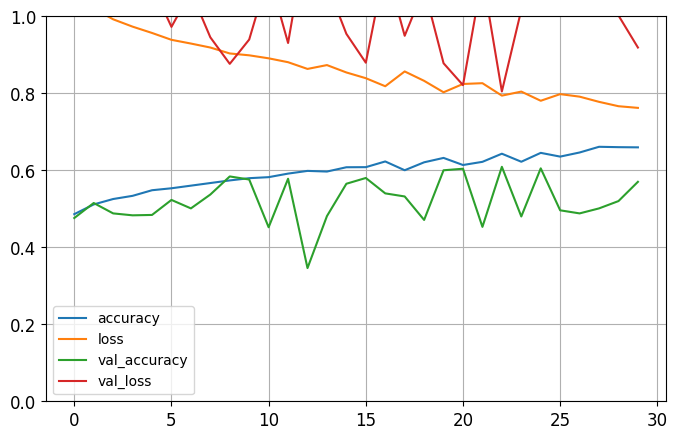

In [38]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

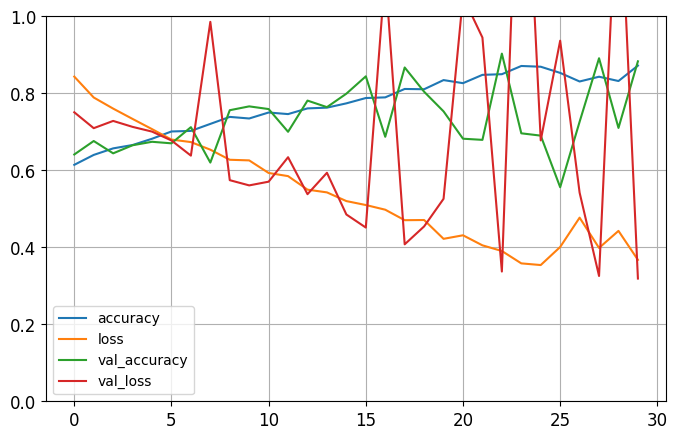

In [39]:
pd.DataFrame(historysgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()

In [40]:
print(X_test.shape, y_test.shape)

(1279, 128, 128) (1279,)


In [41]:
model.evaluate(X_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.5261


[1.2890703678131104, 0.5887411832809448]

# Problem 2: Convolutional Neural Network (CNN)

In [42]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#### Building a CNN

A convolution layer is defined with    
    
    `Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation='relu')`
                 
Where

* `nb_filters` number of convolution filters.
* `kernel_size` size of each filter, say [5,5] for a $5\times 5$ filter.
* `padding` When we convolve, we tend to lower the image size. We can choose to pad the image back to its original size or not. 
* `input_shape` shape of the inputed training data, only required for the first layer. 
* `activation` the activation layer following the convolution layer. 

For a pooling layer we only specify the pool size:

* `MaxPooling2D(pool_size=pool_size)` where `pool_size = [2,2]` down-samples by 2 in each direction. 

After we down-sample enough, we flatten and feed the network into a dense layer to do the fitting. The final architecture looks like the cartoon from class:

<img width= 700 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L12CNN2.PNG">

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D 

## Construct Network
model = Sequential()
model.add(Conv2D(32, (7,7), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(10))

model.summary()

/Users/jasonzhang/Documents/Classes/Spring2024/MATH4570/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 122, 122, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 59, 59, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,002 (13.19 MB)

 Trainable params: 3,457,002 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
## Construct Network
model = Sequential()
model.add(Conv2D(32, (7,7), padding = 'valid', input_shape=(128,128,1), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 122, 122, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 59, 59, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,002 (13.19 MB)

 Trainable params: 3,457,002 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from keras.utils import to_categorical

NUM_LABELS = 4 # 4 classes

## We have to add an extra dimension to allow for the multiple images we will be creating
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

Y_train = to_categorical(y_train, NUM_LABELS)
Y_test = to_categorical(y_test, NUM_LABELS)

In [46]:
model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(128, 128,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_LABELS, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 122, 122, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 59, 59, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,228 (13.18 MB)

 Trainable params: 3,456,228 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

None


In [47]:
Y_train.shape

(4121, 4)

In [48]:
epochs = 5

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 453ms/step - accuracy: 0.4056 - loss: 1.3474 - val_accuracy: 0.5004 - val_loss: 1.0690
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - accuracy: 0.5154 - loss: 1.0435 - val_accuracy: 0.5035 - val_loss: 1.0021
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 426ms/step - accuracy: 0.5545 - loss: 0.9538 - val_accuracy: 0.5090 - val_loss: 0.9841
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 427ms/step - accuracy: 0.5850 - loss: 0.8951 - val_accuracy: 0.5465 - val_loss: 0.9919
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.5945 - loss: 0.8554 - val_accuracy: 0.5786 - val_loss: 0.9317


In [49]:
Y_train

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

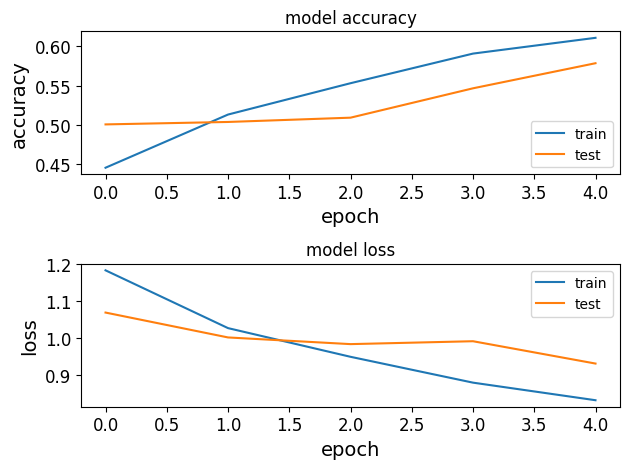

In [51]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

# fig